<a href="https://colab.research.google.com/github/HikmahAlBaity/Wisdom/blob/main/Diabetes_Patient_Classification_%26_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('/content/diabetes.csv')
df.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [13]:
# to check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
# check missing values
#Method 1:
df.isnull()
#False = No missing value
#True = There's a missing value

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [15]:
# method 2
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
#Notice how the result are all zero (0) eventhough we are sure there is a missing value in our data
#The missing data in our data appeared as zero (0), need to use logical reasoning of the data

#replace the '0' by NaN numpy

import numpy as np

df['Glucose'].replace(0, np.nan, inplace = True)
df['BloodPressure'].replace(0, np.nan, inplace = True)
df['SkinThickness'].replace(0, np.nan, inplace = True)
df['Insulin'].replace(0, np.nan, inplace = True)
df['BMI'].replace(0, np.nan, inplace = True)
df['DiabetesPedigreeFunction'].replace(0, np.nan, inplace = True)
df['Age'].replace(0, np.nan, inplace = True)


In [17]:
# check again the missing value
df.isnull().sum()
#

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
# Now the NaN need to be replace with mean value

import numpy as np

df['Glucose'].replace(np.nan, mean_glu, inplace = True)
df['BloodPressure'].replace(np.nan, mean_BP, inplace = True)
df['SkinThickness'].replace(np.nan, mean_skin, inplace = True)
df['Insulin'].replace(np.nan, mean_insulin, inplace = True)
df['BMI'].replace(np.nan, mean_BMI, inplace = True)
df['DiabetesPedigreeFunction'].replace(np.nan, mean_DPF, inplace = True)
df['Age'].replace(np.nan, mean_age, inplace = True)



#Checking total number of missing value in a column AGAIN
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
mean_glu = df['Glucose'].mean()
mean_glu

121.6867627785059

In [19]:
mean_BP = df['BloodPressure'].mean()
mean_BP

72.40518417462484

In [20]:
mean_skin = df['SkinThickness'].mean()
mean_skin

29.153419593345657

In [21]:
mean_insulin = df['Insulin'].mean()
mean_insulin

155.5482233502538

In [22]:
mean_BMI = df['BMI'].mean()
mean_BMI

32.457463672391015

In [23]:
mean_DPF = df['DiabetesPedigreeFunction'].mean()
mean_DPF

0.47187630208333325

In [24]:
mean_age = df['Age'].mean()
mean_age

33.240885416666664

In [26]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [27]:
#define x and y

X = df.iloc[:,:-1]
y = df['Outcome'].values

In [29]:
#Function ni similar to test-train data splitting
from sklearn.model_selection import train_test_split

#if you mention train_size = 0.8 (80%)
#if you mention test_size = 0.2 (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)#random state parameter to reshuffle dataset randomly assigned 80% train and 20% test
#the number 42 is just a inside joke in the data science communities

print (X_train.shape)
print (X_test.shape)

(614, 8)
(154, 8)


In [30]:
# normalisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train[:5] #This part boleh skip

array([[-0.52639686, -1.25828206,  0.01321033,  0.04730861,  0.00739544,
         0.01501323, -0.49073479, -1.03594038],
       [ 1.58804586, -0.32735374,  0.8068672 , -0.56569404,  0.00739544,
        -0.59935041,  2.41502991,  1.48710085],
       [-0.82846011,  0.57032714, -2.17095414, -1.16044733, -0.82739127,
        -0.52719904,  0.54916055, -0.94893896],
       [-1.13052335,  1.30177082, -1.8400851 ,  0.04730861,  0.00739544,
        -1.50845762, -0.63929127,  2.79212217],
       [ 0.68185612,  0.40408994,  0.64143268,  0.98066451,  2.4750161 ,
         1.99809876, -0.68682934,  1.13909516]])

In [31]:
#predict

from sklearn.neighbors import KNeighborsClassifier

#the default parameter for KNeighborsClassifier() is 5 for if you want to change it you have to add the parameter
#KNeighborsClassifier(N=3)
neigh = KNeighborsClassifier()

#training
neigh.fit(X_train, y_train)

#prediction
y_hat = neigh.predict(X_test)

#evaluation
#here will use the accuracy score test
from sklearn.metrics import accuracy_score # import accuracy_score from sklearn.metrics
print('The accuracy is: ', (accuracy_score(y_test, y_hat))*100)

The accuracy is:  74.67532467532467


[0.66233766 0.66233766 0.71428571 0.71428571 0.74675325 0.75324675
 0.7012987  0.70779221 0.71428571 0.75974026 0.75974026 0.75974026
 0.75324675 0.75324675 0.74675325 0.76623377 0.77272727 0.75974026
 0.77272727]




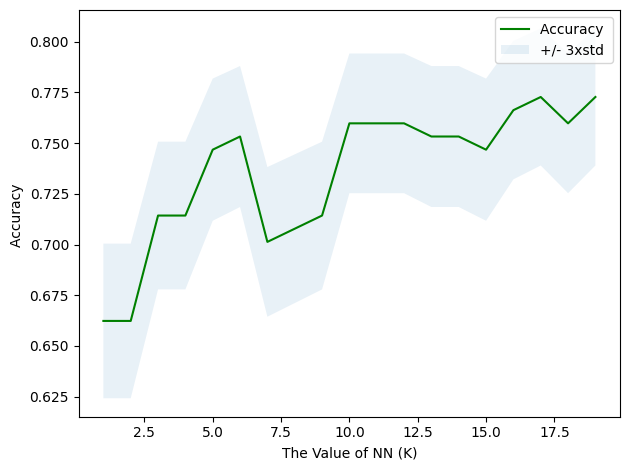



The best accuracy was with 0.7727272727272727 with k= 17


In [32]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

Ks =20 #change the k value here, then the loop will start
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#print (mean_acc) (activate code ni kalau nak semua mean)
print(mean_acc)

print ('')
print ('')

#this is to plot the data
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

DS = DecisionTreeClassifier()

#training
DS.fit(X_train, y_train)

#prediction
y_hat = DS.predict(X_test)

#evaluation
print('The Accuracy Score is: ', accuracy_score(y_test, y_hat))
print ('')
print('The Confusion Matrix is: ', confusion_matrix(y_test, y_hat))
print ('')
print('The Jaccard Score is: ', jaccard_score(y_test, y_hat, average='micro')) # Change average to 'micro'


The Accuracy Score is:  0.6883116883116883

The Confusion Matrix is:  [[73 26]
 [22 33]]

The Jaccard Score is:  0.5247524752475248
